In [ ]:
class BinaryDiceLoss(nn.Module):
    """Soft Dice loss of binary class
    Args:
        p: Denominator value: \sum{x^p} + \sum{y^p}, default: 2
        predict: A tensor of shape [N, *]
        target: A tensor of shape same with predict
       Returns:
        Loss tensor

    """

    def __init__(self, p=2, epsilon=1e-6):
        super().__init__()
        self.p = p  # pow degree
        self.epsilon = epsilon

    def forward(self, predict, target):
        predict = predict.flatten(1)
        target = target.flatten(1)

        # https://pytorch.org/docs/stable/generated/torch.mul.html
        num = torch.sum(torch.mul(predict, target), dim=1) + self.epsilon
        den = torch.sum(predict.pow(self.p) + target.pow(self.p), dim=1) + self.epsilon
        loss = 1 - 2 * num / den

        return loss.mean()  # over batch


criterion = BinaryDiceLoss()
output = torch.tensor([[[1, 1, 1], [1, 1, 1], [1, 1, 1]]], dtype=torch.float)


target = torch.tensor([[[1, 1, 1], [1, 1, 1], [1, 1, 1]]], dtype=torch.float)

soft_loss = criterion(output.unsqueeze(0), target.unsqueeze(0))
print("Loss", soft_loss)

<table><tr>
<td>
Two-stage
<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L12/faster_r_cnn_scheme.png" >
Faster RCNN
</td>
<td>
One Stage 
<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L12/yolov3_prediction.png" >
(SSD, YOLOv1 - 5)
</td>
<td>

Anchor Free (FCos)

</td>

<td>
Patch Based


</td>



</tr></table>

In [ ]:
cross_entropy = nn.CrossEntropyLoss()
# If containing class probabilities, same shape as the input and each value should be between [0,1][0,1].
loss = cross_entropy(two_class_out, float_target.unsqueeze(0))
print(loss)

tensor(0.9217)


In [ ]:
cross_entropy = nn.CrossEntropyLoss()
p_out = nn.Sigmoid()(two_class_out)
# If containing class probabilities, same shape as the input and each value should be between [0,1][0,1].
loss = cross_entropy(p_out, float_target.unsqueeze(0))
print(loss)

tensor(0.7121)


In [ ]:
diff = two_class_out.sigmoid().max(dim=1)[0] - two_class_out.softmax(dim=1)
print(diff)

tensor([[[[-0.2258,  0.4564,  0.8864,  ...,  0.4489, -0.0275, -0.0610],
          [ 0.5163, -0.1975,  0.1858,  ..., -0.0563, -0.2108, -0.2884],
          [-0.3704, -0.0861, -0.0601,  ...,  0.7769, -0.0592,  0.0550],
          ...,
          [ 0.5468,  0.6002, -0.0640,  ..., -0.0955,  0.2776,  0.2597],
          [ 0.1839,  0.7145,  0.4449,  ...,  0.1216, -0.0695, -0.1844],
          [ 0.0873,  0.3666,  0.0377,  ...,  0.1065,  0.3142, -0.1563]],

         [[ 0.1400, -0.0889, -0.0863,  ...,  0.3890,  0.4259, -0.0183],
          [-0.2197,  0.3390,  0.2808,  ..., -0.3010,  0.0011,  0.0072],
          [ 0.1508,  0.7346, -0.3848,  ..., -0.0406,  0.5679, -0.2041],
          ...,
          [-0.0850,  0.1451,  0.4792,  ...,  0.7320, -0.1602, -0.0396],
          [-0.3574, -0.1006, -0.1025,  ...,  0.1398,  0.6084,  0.5573],
          [ 0.4299,  0.1066, -0.0698,  ..., -0.0028, -0.2985,  0.3575]]]])


##DETR (2020)

[End-to-End Object Detection with Transformers](https://arxiv.org/abs/2005.12872)

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L12/detr1.png" width="900">

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L12/detr2.png" width="900">

Если классов несколько:

In [ ]:
x = np.array([
    [0,1,0],
    [5,5,4]])
x.argmax(axis = 1)


array([1, 0])

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(90, 240, 320)
[0 1]
[0 1]


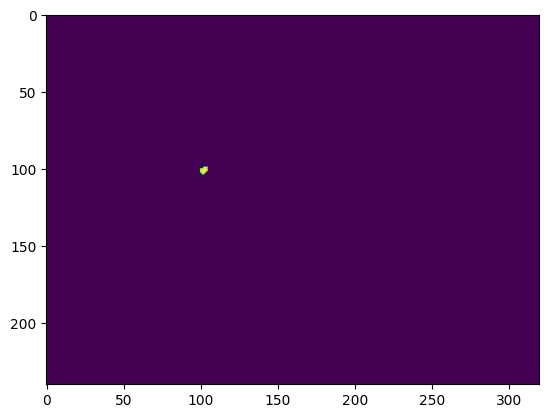

In [ ]:
multilabel_mask = np.zeros((90,I.size[1],I.size[0]),dtype = int)

masks = []
for ann in anns:
  if ann['iscrowd'] == False:
    cat = ann['category_id']
    #print(type(cat),cat)
    multilabel_mask[cat] += coco.annToMask(ann).astype(int)
  #  masks.append(coco.annToMask(ann))
print(multilabel_mask[:,200,200])
print(multilabel_mask.shape)
plt.imshow(multilabel_mask[37])
multiclass_mask = np.argmax(multilabel_mask,axis = 0)
print(np.unique(multiclass_mask))

#multiclass_mask[multiclass_mask ==40] =3
#multiclass_mask[multiclass_mask ==37] =2
print(np.unique(multiclass_mask))
#plt.imshow(multiclass_mask)
plt.show()

#### <font color="orange">Подробнее про COCO mAP</font>


В последних исследовательских работах как правило приводятся результаты только для набора данных COCO. Для COCO AP — это среднее значение (*mean*) по нескольким IoU (минимальный IoU, который следует считать положительным совпадением). AP@[.5:.95] соответствует среднему AP для IoU от 0.5 до 0.95 с шагом 0.05. 

Давайте попробуем посчитать mAP. Для этого посчитаем AP для каждого уровня IoU:

In [ ]:
"""
nn_prediction_at_iou = []
APs = []
for iou in np.arange(0.5, 1, 0.05):
    nn_preds_limited = nn_preds[nn_preds["IoU"] >= iou].copy()
    nn_preds_limited = smooth_precision(nn_preds_limited)
    AP = auc(nn_preds_limited.recall, nn_preds_limited.smooth_precision)
    APs.append(AP)
"""

'\nnn_prediction_at_iou = []\nAPs = []\nfor iou in np.arange(0.5, 1, 0.05):\n    nn_preds_limited = nn_preds[nn_preds["IoU"] >= iou].copy()\n    nn_preds_limited = smooth_precision(nn_preds_limited)\n    AP = auc(nn_preds_limited.recall, nn_preds_limited.smooth_precision)\n    APs.append(AP)\n'

In [ ]:
"""
plt.figure(figsize=(8, 4), dpi=80)

plt.plot(np.arange(0.5, 1, 0.05), APs, color="black")
plt.axhline(np.mean(APs), color="red", ls="--", label="mAP")
plt.xlabel("IoU")
plt.ylabel("AP")
plt.grid("on")
plt.legend()

print("mAP@[0.5:0.95] = %.2f" % np.mean(APs))
plt.show()
"""

'\nplt.figure(figsize=(8, 4), dpi=80)\n\nplt.plot(np.arange(0.5, 1, 0.05), APs, color="black")\nplt.axhline(np.mean(APs), color="red", ls="--", label="mAP")\nplt.xlabel("IoU")\nplt.ylabel("AP")\nplt.grid("on")\nplt.legend()\n\nprint("mAP@[0.5:0.95] = %.2f" % np.mean(APs))\nplt.show()\n'

Есть несколько различных определений mAP, которые разнятся от соревнования к соревнованию (суть одинаковая, но разница в деталях подхода), поэтому для каждого соревнования лучше использовать их собственные библиотеки для расчета.

Самый простой способ это сделать:
- создать пустое изображение нужного размера (4x4);
- поделить его на 4 части (по числу пикселей исходного изображения);
- каждую часть закрасить цветом соответствующего пикселя маленького изображения.

Это интерполяция методом ближайшего соседа (Nearest neighbor interpolation).

Она реализована в пакете [Pillow Image](https://pillow.readthedocs.io/en/stable/reference/Image.html):

In [ ]:
!wget https://edunet.kea.su/repo/EduNet-content/L12/out/semantic_segmentation_1.png -O cat.png

--2023-06-03 04:56:38--  https://edunet.kea.su/repo/EduNet-content/L12/out/semantic_segmentation_1.png
Resolving edunet.kea.su (edunet.kea.su)... 89.175.15.242
Connecting to edunet.kea.su (edunet.kea.su)|89.175.15.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 348184 (340K) [image/png]
Saving to: ‘cat.png’

cat.png             100%[===================>] 340.02K  1.88MB/s    in 0.2s    

2023-06-03 04:56:39 (1.88 MB/s) - ‘cat.png’ saved [348184/348184]



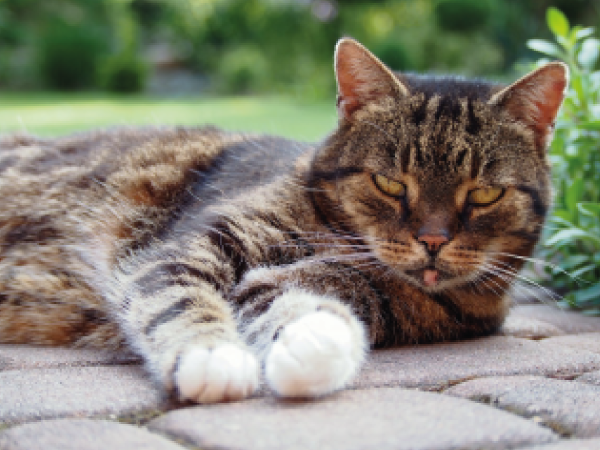

In [ ]:
from PIL import Image

img = Image.open("cat.png")
img

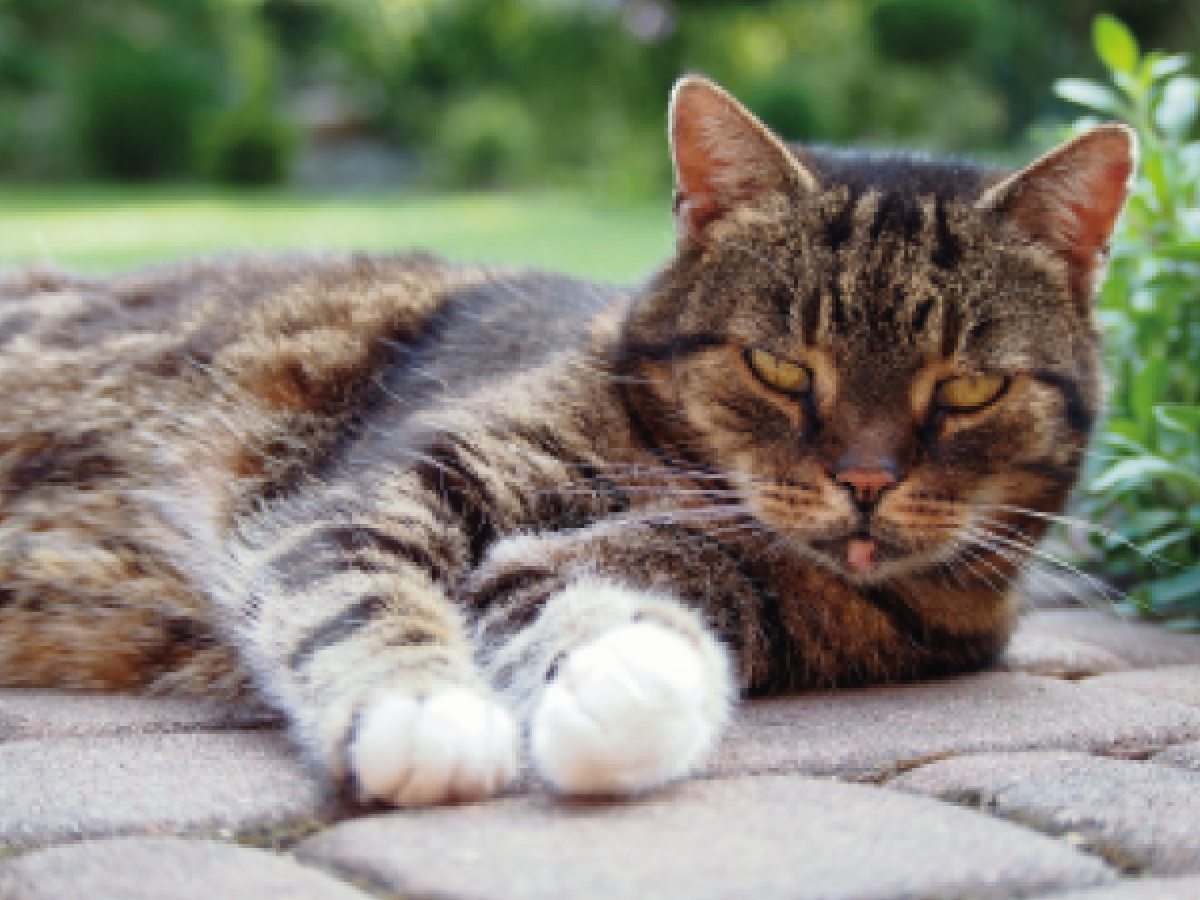

In [ ]:
import numpy as np

new_size = np.array(img.size) * 2
resized = img.resize(new_size, resample=Image.NEAREST)
resized

Это не самый лучший вид интерполяции: на изображении появились артефакты (квадраты).

Чтобы избавиться от таких артефактов, можно значениям новых пикселей присваивать интерполированное значение яркости исходных.

<img src ="https://edunet.kea.su/repo/EduNet-content/L12/out/change_size_of_image.png" width="800">

#### <font color="orange">Подробнее про интерполяцию</font>

Билинейная интерполяция рассматривает квадрат соседних пикселей. В качестве интерполированного значения используется взвешенное среднее этих четырёх пикселей. 

Отметим, что чем ближе интерполируемое значение находится к одному из известных пикселей, тем больший вес будет у значения этого пикселя при подсчёте взвешенной суммы. 

<img src ="https://edunet.kea.su/repo/EduNet-content/L12/out/pixel_iterpolation_2x2.png" width="800">

Иногда окрестность $2\times2$ может быть не достаточна для сохранения важной информации о распределении цветов в окружающих пикселях (пример будет приведён далее). В таких случаях можно попробовать использовать большую окрестность для интерполяции (к примеру, $4\times4$). Такая интерполяция называется бикубической и имеет более сложную формулу, чем билинейная, однако основной принцип остаётся тем же: чем ближе пиксель к пикселю с известным значением, тем больше "вес" последнего при интерполяции.

<img src ="https://edunet.kea.su/repo/EduNet-content/L12/out/pixel_iterpolation_4x4.png" width="800">

### Spatial pyramid pooling (SPP) layer

[Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition (He et al., 2014)](https://arxiv.org/abs/1406.4729)

**Spatial Pyramid Pooling (SPP)** — это *pooling* слой, который устраняет ограничение фиксированного размера сети, т.е. CNN не требует входного изображения фиксированного размера. В частности, мы добавляем слой SPP поверх последнего сверточного слоя. 

Слой SPP объединяет признаки и генерирует выходные данные фиксированной длины, которые затем поступают в MLP (или другие классификаторы). Другими словами, мы выполняем некоторую агрегацию информации на более глубоком этапе иерархии сети (между сверточными слоями и полносвязными слоями), чтобы избежать необходимости обрезать или деформировать изображение в начале.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L12/spatial_pyramid_pooling_layer.png" width="700"></center>
<center><em>Схема SPP (He et al., 2014).</em></center>

<center><p><em>Source: <a href="https://arxiv.org/pdf/1406.4729.pdf">Spatial Pyramid Pooling in Deep Convolutional
Networks for Visual Recognition</a></p> </em></center>


В PyTorch нет отдельного модуля, но результат может быть получен за счет применения нескольких AdaptiveMaxPool2d с разными размерами выходов.